In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Prepare data
df = pd.read_csv('生育花销.csv')
df['日期'] = df['日期'].apply(lambda x: x[0:10])
df.head()

,日期,金额,项目,备注
0,2016-09-16,28.00,药品,叶酸
1,2016-09-17,12.00,挂号,NaN
2,2016-09-17,225.36,孕检,NaN
3,2016-09-18,5.00,挂号,NaN
4,2016-09-20,310.28,孕检,NaN


In [2]:
def days_in(start_date, end_date):
    return (datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')). days

days = days_in(df['日期'].min(), df['日期'].max())
grand_total = df['金额'].sum()
before_born = df[(df.iloc[:, 0].le('2017-05-15 23:59:59'))]
before_born_total = before_born.iloc[:, 1].sum()
daily_cost = grand_total / days
days_before_born = days_in(df['日期'].min(), '2017-05-19')

print('生育总天数 = ', days)
print('总花销 = ', grand_total)
print('花销笔数 = ', df.shape[0])
print('每笔平均花销 = ', grand_total / df.shape[0])
print('日均花销 = ', daily_cost)
print('出生前总花销 = ', before_born_total)
print('出生前日均花销 = ', before_born_total / days_before_born)
print('出生前每笔平均花销 = ', before_born_total / before_born.shape[0])

生育总天数 =  286
总花销 =  31796.799999999996
花销笔数 =  87
每笔平均花销 =  365.4804597701149
日均花销 =  111.17762237762236
出生前总花销 =  10268.11
出生前日均花销 =  41.910653061224494
出生前每笔平均花销 =  233.36613636363637


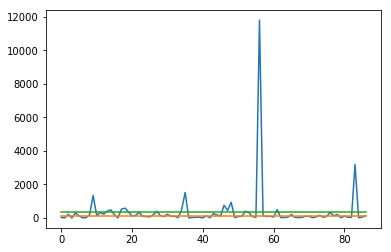

In [3]:
daily_avg = df.iloc[:, 0].apply(lambda x: daily_cost)
trans_avg = daily_avg.apply(lambda x: grand_total / df.shape[0])
plt.plot(df.iloc[:, 1])
plt.plot(daily_avg)
plt.plot(trans_avg)

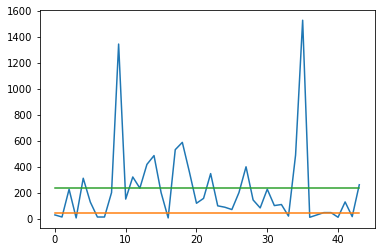

In [4]:
avg_before_born = before_born.iloc[:, 0].apply(lambda x : before_born_total / days_before_born)
trans_avg_before_born = avg_before_born.apply(lambda x: before_born_total / before_born.shape[0])
plt.plot(before_born.iloc[:, 1])
plt.plot(avg_before_born)
plt.plot(trans_avg_before_born)